<a href="https://colab.research.google.com/github/ella417/ML_Study/blob/main/Siyeon_WK2_HW_MLstudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ -> google driveÏóê ÏóÖÎ°úÎìú ÌõÑ ÎßàÏö¥Ìä∏ÌïòÎäî Î∞©Ïãù ÏÇ¨Ïö©Ìï®

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd  # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Îã§Î£®Í∏∞
import numpy as np
import seaborn as sns # ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt # Í∏∞Î≥∏ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('/content/drive/My Drive/ML_Study/titanic/train.csv')

# 1. ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
ÌÉÄÏù¥ÌÉÄÎãõ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò® Îí§ Î∞è Ï†ÑÏ≤¥ Íµ¨Ï°∞(shape, info, describe) Í∞ÑÎã®Ìûà ÌôïÏù∏ÌïòÍ≥† Ï†ïÎ¶¨

In [27]:
df.info() # Î≥ÄÏàòÎ™Ö, ÏûêÎ£åÌòï, Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.shape # ÌñâÍ≥º Ïó¥ Í∞úÏàò ÌôïÏù∏ -> (Ìñâ Ïàò, Ïó¥ Ïàò) ÌäúÌîåÎ°ú Î∞òÌôòÎê®

(891, 12)

In [29]:
df.describe() # ÏàòÏπòÌòï Î≥ÄÏàòÏùò ÏöîÏïΩ ÌÜµÍ≥Ñ

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# 2. Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî

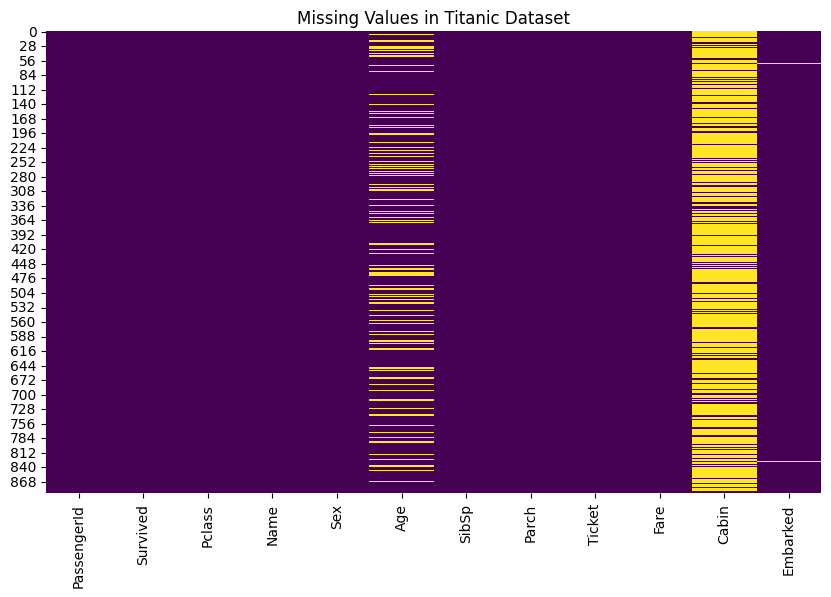

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Titanic Dataset")
plt.show()

# 3. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [31]:
# CabinÏùò Í≤ΩÏö∞ Í≤∞Ï∏°Î•†Ïù¥ 70% Ïù¥ÏÉÅÏúºÎ°ú ÎÜíÏùÄ Ìé∏Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïó¥ ÏÇ≠Ï†úÍ∞Ä Ï†ÅÌï©Ìï† Í≤ÉÏúºÎ°ú ÌåêÎã®Ìï®
df = df.drop(columns=['Cabin'])

In [32]:
# AgeÏùò Í≤ΩÏö∞ ÏàòÏπòÌòï Î≥ÄÏàòÎ°ú, Ïó∞ÏÜçÌòï(numerical) Î≥ÄÏàò. Îã§Î•∏ Î≥ÄÏàòÏôÄÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º ÌôúÏö©Ìï¥ iterative Ï≤òÎ¶¨Í∞Ä Ìö®Í≥ºÏ†ÅÏùº Í≤ÉÏúºÎ°ú ÌåêÎã®Ìï®
# Fare, Pclass, SibSp, Parch Îì±Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏùÑ Í≤ÉÏù¥Îùº ÌåêÎã®Ìï®
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

imp = IterativeImputer()
df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']] = imp.fit_transform(df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])

In [33]:
# Embarked : Í≤∞Ï∏°Î•†Ïù¥ ÎÇÆÍ∏∞ ÎïåÎ¨∏Ïóê ÏµúÎπàÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏõÄ
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 4. Age Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï†úÍ±∞

<Axes: xlabel='Age'>

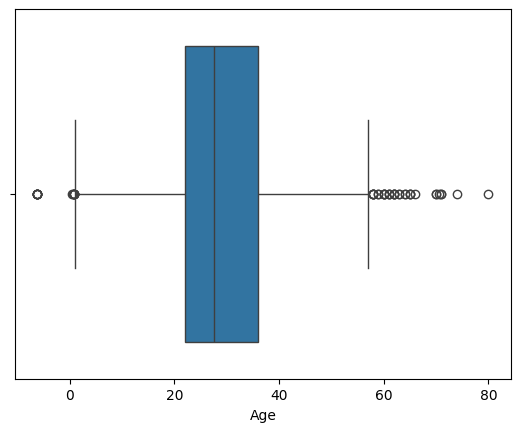

In [35]:
sns.boxplot(x=df['Age'])

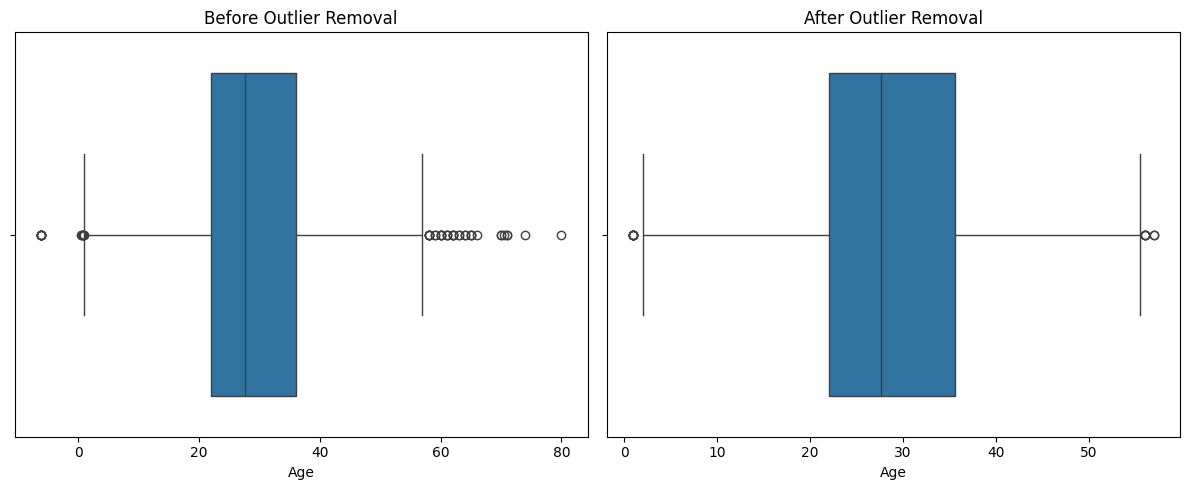

In [36]:
# Q1 ÏùÄ 1ÏÇ¨Î∂ÑÏúÑÏàò(25%), Q3ÏùÄ 3ÏÇ¨Î∂ÑÏúÑÏàò(75%)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1 # Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÍ∞Ñ 50% Î≤îÏúÑ

# 2. Ïù¥ÏÉÅÏπò Í∏∞Ï§Ä ÏÑ§Ï†ï
#Ï†ïÍ∑úÎ∂ÑÌè¨ÎùºÎ©¥ ÏïΩ 99.3%Ïùò Îç∞Ïù¥ÌÑ∞,ÏñëÏ™Ω Í∑πÎã®Ïóê ÏûàÎäî ÏïΩ 0.7% (Ï¢åÏö∞ 0.35%Ïî©)Í∞Ä Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)].copy()

#Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†Ñ/ÌõÑ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Before Outlier Removal')

sns.boxplot(x=df_cleaned['Age'], ax=axes[1])
axes[1].set_title('After Outlier Removal')
plt.tight_layout()
plt.show()

In [38]:
# Ï†ÑÏ≤òÎ¶¨
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
# df.dropna(inplace=True)  # Í≤∞Ï∏°Ïπò Ï†úÍ±∞Ïù∏Îç∞ Ïïà Ìï¥ÎèÑ Îê® ÏïûÏóêÏÑú ÌñàÏùå

# Î≤îÏ£ºÌòï ‚Üí Ïà´ÏûêÎ°ú Î≥ÄÌôò
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# ÏûÖÎ†•/Ï∂úÎ†• ÎÇòÎàÑÍ∏∞
X = df.drop(columns=['Survived'])
y = df['Survived']

# ÌïôÏäµÏö©/ÌÖåÏä§Ìä∏Ïö© Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ Ïä§ÏºÄÏùºÎßÅ Ìï®Ïàò Ï†ïÏùò (ÏàòÏ†ïÌïòÏßÄ ÎßàÏÑ∏Ïöî)
def scale_age(X_train, X_test, scaler):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled['Age'] = scaler.fit_transform(X_train[['Age']])
    X_test_scaled['Age'] = scaler.transform(X_test[['Age']])
    return X_train_scaled, X_test_scaled


# ‚úÖ KNN ÌèâÍ∞Ä Ìï®Ïàò (ÏàòÏ†ïÌïòÏßÄ ÎßàÏÑ∏Ïöî)
def evaluate_knn(X_train, X_test, y_train, y_test, label):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{label:<20} Accuracy: {acc:.4f}')

#‚úÖ ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÎ†§Î©¥ ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÎ≥¥ÏÑ∏Ïöî
# 1. Ïä§ÏºÄÏùºÎßÅ ÏóÜÏù¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
evaluate_knn(X_train, X_test, y_train, y_test, "No Scaling")

# 2. StandardScaler Ï†ÅÏö©
X_train_std, X_test_std = scale_age(X_train, X_test, StandardScaler())
evaluate_knn(X_train_std, X_test_std, y_train, y_test, "StandardScaler")

# 3. MinMaxScaler Ï†ÅÏö©
X_train_minmax, X_test_minmax = scale_age(X_train, X_test, MinMaxScaler())
evaluate_knn(X_train_minmax, X_test_minmax, y_train, y_test, "MinMaxScaler")

# 4. RobustScaler Ï†ÅÏö©
X_train_robust, X_test_robust = scale_age(X_train, X_test, RobustScaler())
evaluate_knn(X_train_robust, X_test_robust, y_train, y_test, "RobustScaler")


No Scaling           Accuracy: 0.7207
StandardScaler       Accuracy: 0.7765
MinMaxScaler         Accuracy: 0.8101
RobustScaler         Accuracy: 0.7709


<ipython-input-38-991b36484447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
<ipython-input-38-991b36484447>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [41]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞(Ï†ÑÏ≤òÎ¶¨ Ï†Ñ)
df_raw = pd.read_csv('/content/drive/My Drive/ML_Study/titanic/train.csv')

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÏÉÅÌÉú <- Îã§ Ìï¥ÎíÄÏúºÎãà Í∑∏ÎåÄÎ°ú Î≥µÏÇ¨
df_cleaned = df.copy()

# ÎπÑÍµê
print("üîπ [Ï†ÑÏ≤òÎ¶¨ Ï†Ñ] df_raw")
print("- shape:", df_raw.shape)
print("- Ïª¨Îüº Î™©Î°ù:", df_raw.columns.tolist())
print("- Í≤∞Ï∏°Ïπò:\n", df_raw.isnull().sum())
df_raw.info()

print("\n\nüîπ [Ï†ÑÏ≤òÎ¶¨ ÌõÑ] df_cleaned")
print("- shape:", df_cleaned.shape)
print("- Ïª¨Îüº Î™©Î°ù:", df_cleaned.columns.tolist())
print("- Í≤∞Ï∏°Ïπò:\n", df_cleaned.isnull().sum())
df_cleaned.info()

üîπ [Ï†ÑÏ≤òÎ¶¨ Ï†Ñ] df_raw
- shape: (891, 12)
- Ïª¨Îüº Î™©Î°ù: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
- Í≤∞Ï∏°Ïπò:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    objec

1. Ìñâ, Ïó¥ Ïàò Î≥ÄÌôî
-  Ï†Ñ : (891, 11) -> ÌõÑ : (891, 6)
2. Ï†úÍ±∞ÎêòÍ±∞ÎÇò Ï∂îÍ∞ÄÎêú ÏπºÎüº
- PassengerId, Name, Ticket, Cabin, SibSp, Parch <-  Survived, Pclass, Sex, Age, Fare, Embarked Î•º Ï†úÏô∏ÌïòÍ≥† Ï†úÍ±∞Ìï®
3. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Í≤∞Í≥º
- Ï≤òÎ¶¨ Ï†Ñ age 177, cabin 687, embarked 2 -> Ï≤òÎ¶¨ ÌõÑ Ï†ÑÎ∂Ä 0 (cabinÏùÄ Ïª¨Îüº ÏÇ≠Ï†ú)
4. Îç∞Ïù¥ÌÑ∞ ÏûêÎ£åÌòï ÎπÑÍµê
- Sex, Embarked : Ï†ÑÏ≤òÎ¶¨ Ï†Ñ	object -> Ï†ÑÏ≤òÎ¶¨ ÌõÑ	int64
- ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò